In [21]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

plt.style.use('fivethirtyeight')

# column display option so the middle columns don't just get hidden away
pd.set_option("display.max_columns",500)
# set color palette so make visuals look better
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# retrieve api key from json file (api registered from Fred website)
fred_api_key = json.load(open('./apikey.json'))['apikey']

## 1. Create the Fred object

In [22]:
fred = Fred(api_key=fred_api_key)
print(fred)

## 2. Search for Economic data

In [28]:
sp_search_df = fred.search('S&P',order_by='popularity')
sp_search_df.shape
sp_search_df.head(3)

id realtime_start realtime_end  \
series id                                                
BAMLH0A0HYM2  BAMLH0A0HYM2     2023-02-05   2023-02-05   
CSUSHPINSA      CSUSHPINSA     2023-02-05   2023-02-05   
SP500                SP500     2023-02-05   2023-02-05   

                                                          title  \
series id                                                         
BAMLH0A0HYM2  ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                   S&P 500   

             observation_start observation_end     frequency frequency_short  \
series id                                                                      
BAMLH0A0HYM2        1996-12-31      2023-02-02  Daily, Close               D   
CSUSHPINSA          1987-01-01      2022-11-01       Monthly               M   
SP500               2013-02-04      2023-02-03  Daily, Close               D   

                           units         units_short      seasonal_adjustment  \
series id                                                                       
BAMLH0A0HYM2             Percent                   %  Not Seasonally Adjusted   
CSUSHPINSA    Index Jan 2000=100  Index Jan 2000=100  Not Seasonally Adjusted   
SP500                      Index               Index  Not Seasonally Adjusted   

             seasonal_adjustment_short               last_updated popularity  \
series id                                                                      
BAMLH0A0HYM2                       NSA  2023-02-03 08:49:08-06:00         94   
CSUSHPINSA                         NSA  2023-01-31 08:01:02-06:00         90   
SP500                              NSA  2023-02-03 19:11:01-06:00         84   

                                                          notes  
series id                                                        
BAMLH0A0HYM2  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA    For more information regarding the index, plea...  
SP500         The observations for the S&P 500 represent the...

## 3. Pull Raw Data

In [30]:
sp500_df = fred.get_series(series_id='SP500')
sp500_df.shape
sp500_df.head(5)

2013-02-04    1495.71
2013-02-05    1511.29
2013-02-06    1512.12
2013-02-07    1509.39
2013-02-08    1517.93
dtype: float64

<AxesSubplot: title={'center': 'S&P500'}>

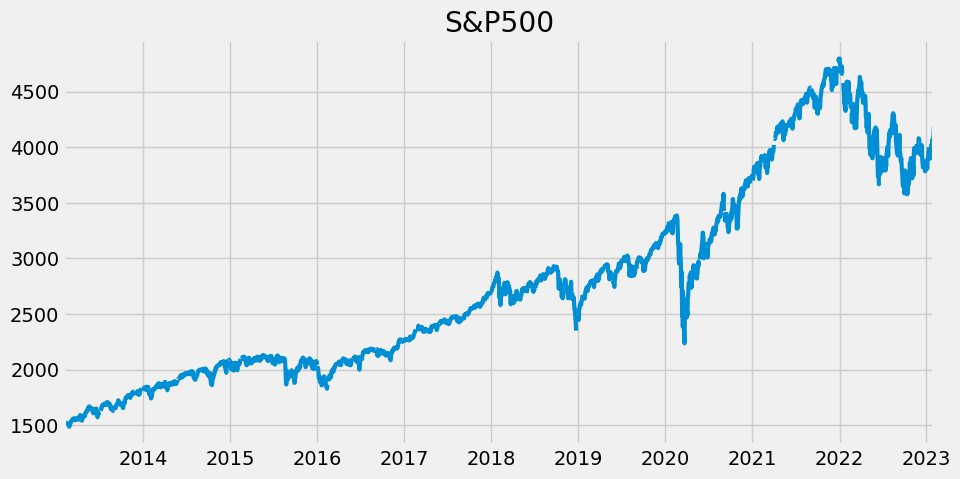

In [38]:
sp500_df.plot(
    figsize=(10,5), # zoom
    lw = 3,         # lineweight
    title='S&P500'
)

## 4. Pull and Join Multiple Data Series

In [40]:
uemp_df = fred.get_series('UNRATE')

<AxesSubplot: >

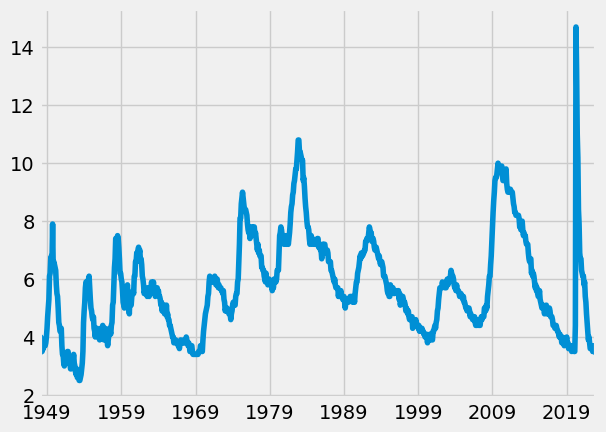

In [42]:
uemp_df.plot()

In [62]:
uemp_rate_df = fred.search('unemployement rate state', filter=('frequency','Monthly'))
print(uemp_rate_df.shape)
uemp_rate_df.head(3)

(1000, 15)


id realtime_start realtime_end               title  \
series id                                                              
UNRATE        UNRATE     2023-02-05   2023-02-05   Unemployment Rate   
UNRATENSA  UNRATENSA     2023-02-05   2023-02-05   Unemployment Rate   
UNEMPLOY    UNEMPLOY     2023-02-05   2023-02-05  Unemployment Level   

          observation_start observation_end frequency frequency_short  \
series id                                                               
UNRATE           1948-01-01      2023-01-01   Monthly               M   
UNRATENSA        1948-01-01      2023-01-01   Monthly               M   
UNEMPLOY         1948-01-01      2023-01-01   Monthly               M   

                          units        units_short      seasonal_adjustment  \
series id                                                                     
UNRATE                  Percent                  %      Seasonally Adjusted   
UNRATENSA               Percent                  %  Not Seasonally Adjusted   
UNEMPLOY   Thousands of Persons  Thous. of Persons      Seasonally Adjusted   

          seasonal_adjustment_short               last_updated popularity  \
series id                                                                   
UNRATE                           SA  2023-02-03 07:44:02-06:00         95   
UNRATENSA                       NSA  2023-02-03 07:43:02-06:00         57   
UNEMPLOY                         SA  2023-02-03 07:44:05-06:00         69   

                                                       notes  
series id                                                     
UNRATE     The unemployment rate represents the number of...  
UNRATENSA  The unemployment rate represents the number of...  
UNEMPLOY   The series comes from the 'Current Population ...

In [63]:
# We take only seasonally adjusted and units is percent
uemp_rate_df = uemp_rate_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
print(uemp_rate_df.shape)

(169, 15)


In [68]:
uemp_rate_df = uemp_rate_df.loc[uemp_rate_df['title'].str.contains('unemployment rate',case=False)]
print(uemp_rate_df.shape)
uemp_rate_df.head(3)

(104, 15)


id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2023-02-05   2023-02-05   
LNS14000006  LNS14000006     2023-02-05   2023-02-05   
CAUR                CAUR     2023-02-05   2023-02-05   

                                                     title observation_start  \
series id                                                                      
UNRATE                                   Unemployment Rate        1948-01-01   
LNS14000006  Unemployment Rate - Black or African American        1972-01-01   
CAUR                       Unemployment Rate in California        1976-01-01   

            observation_end frequency frequency_short    units units_short  \
series id                                                                    
UNRATE           2023-01-01   Monthly               M  Percent           %   
LNS14000006      2023-01-01   Monthly               M  Percent           %   
CAUR             2022-12-01   Monthly               M  Percent           %   

             seasonal_adjustment seasonal_adjustment_short  \
series id                                                    
UNRATE       Seasonally Adjusted                        SA   
LNS14000006  Seasonally Adjusted                        SA   
CAUR         Seasonally Adjusted                        SA   

                          last_updated popularity  \
series id                                           
UNRATE       2023-02-03 07:44:02-06:00         95   
LNS14000006  2023-02-03 07:44:12-06:00         66   
CAUR         2023-01-25 08:27:02-06:00         57   

                                                         notes  
series id                                                       
UNRATE       The unemployment rate represents the number of...  
LNS14000006  The series comes from the 'Current Population ...  
CAUR                                                      None

In [71]:
print(uemp_rate_df.index)
len(uemp_rate_df.index)

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'LNS14000031', 'LNS14000024', 'U2RATE', 'FLUR', 'TXUR',
       ...
       'LNS14000093', 'CSOUUR', 'LNS14000048', 'CESCUR', 'LRUN25MAUSM156S',
       'LNS14000150', 'LNS14023705', 'LRUN25TTUSM156S', 'CNEWUR',
       'LNS14000164'],
      dtype='object', name='series id', length=104)


104

In [72]:
results_list = []

for id in uemp_rate_df.index:
    results = fred.get_series(id)
    results = results.to_frame(name=id)
    results_list.append(results)

In [73]:
len(results_list)

104

In [100]:
uemp_results_df = pd.concat(results_list, axis=1)

In [101]:
uemp_results_df.drop('UNRATE',axis=1).dropna(axis=1,how='all')

LNS14000006  CAUR  M0892AUSM156SNBR  M0892BUSM156SNBR  \
1929-04-01          NaN   NaN              0.69               NaN   
1929-05-01          NaN   NaN              1.65               NaN   
1929-06-01          NaN   NaN              2.06               NaN   
1929-07-01          NaN   NaN              0.79               NaN   
1929-08-01          NaN   NaN              0.04               NaN   
...                 ...   ...               ...               ...   
2022-09-01          5.9   3.8               NaN               NaN   
2022-10-01          5.9   4.0               NaN               NaN   
2022-11-01          5.7   4.1               NaN               NaN   
2022-12-01          5.7   4.1               NaN               NaN   
2023-01-01          5.4   NaN               NaN               NaN   

            LNS14000031  LNS14000024  U2RATE  FLUR  TXUR  NYUR  LNS14000002  \
1929-04-01          NaN          NaN     NaN   NaN   NaN   NaN          NaN   
1929-05-01          NaN          NaN     NaN   NaN   NaN   NaN          NaN   
1929-06-01          NaN          NaN     NaN   NaN   NaN   NaN          NaN   
1929-07-01          NaN          NaN     NaN   NaN   NaN   NaN          NaN   
1929-08-01          NaN          NaN     NaN   NaN   NaN   NaN          NaN   
...                 ...          ...     ...   ...   ...   ...          ...   
2022-09-01          5.8          3.2     1.5   2.5   4.0   4.3          3.4   
2022-10-01          5.3          3.4     1.6   2.7   4.0   4.3          3.7   
2022-11-01          5.4          3.3     1.7   2.6   4.0   4.3          3.6   
2022-12-01          5.1          3.2     1.6   2.5   3.9   4.3          3.6   
2023-01-01          5.3          3.2     1.5   NaN   NaN   NaN          3.3   

            LNS14000009  LNS14000003  LNS14027662  LNS14000001  OHUR  \
1929-04-01          NaN          NaN          NaN          NaN   NaN   
1929-05-01          NaN          NaN          NaN          NaN   NaN   
1929-06-01          NaN          NaN          NaN          NaN   NaN   
1929-07-01          NaN          NaN          NaN          NaN   NaN   
1929-08-01          NaN          NaN          NaN          NaN   NaN   
...                 ...          ...          ...          ...   ...   
2022-09-01          3.9          3.1          1.8          3.6   4.0   
2022-10-01          4.2          3.3          1.9          3.7   4.2   
2022-11-01          4.0          3.3          2.0          3.7   4.2   
2022-12-01          4.1          3.0          1.9          3.4   4.2   
2023-01-01          4.5          3.1          2.0          3.6   NaN   

            LNS14027660  MIUR  LRUN64TTUSM156S  PAUR  ALUR  NCUR  MOUR  \
1929-04-01          NaN   NaN              NaN   NaN   NaN   NaN   NaN   
1929-05-01          NaN   NaN              NaN   NaN   NaN   NaN   NaN   
1929-06-01          NaN   NaN              NaN   NaN   NaN   NaN   NaN   
1929-07-01          NaN   NaN              NaN   NaN   NaN   NaN   NaN   
1929-08-01          NaN   NaN              NaN   NaN   NaN   NaN   NaN   
...                 ...   ...              ...   ...   ...   ...   ...   
2022-09-01          3.7   4.1         3.561947   4.1   2.6   3.6   2.4   
2022-10-01          3.9   4.2         3.704447   4.0   2.7   3.8   2.6   
2022-11-01          3.9   4.3         3.644741   4.0   2.7   3.9   2.7   
2022-12-01          3.6   4.3         3.494326   3.9   2.8   3.9   2.8   
2023-01-01          3.7   NaN              NaN   NaN   NaN   NaN   NaN   

            LNS14032183  GAUR  ILUR  KYUR  VAUR  COUR  WIUR  WAUR  MNUR  OKUR  \
1929-04-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   N

<AxesSubplot: >

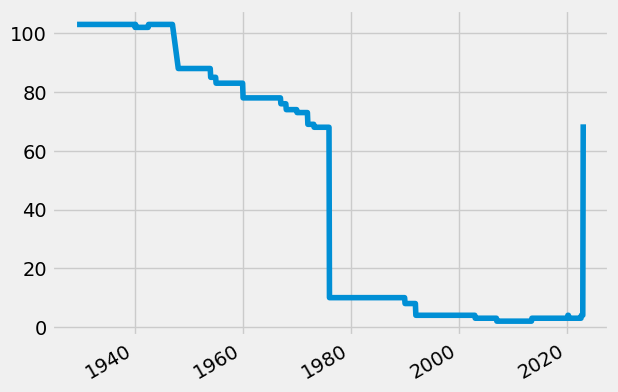

In [102]:
# shows trend of where na numbers were high, from this plot, we determine 1980 is the cut off
uemp_results_df.isna().sum(axis=1).plot()

In [105]:
uemp_results_df = uemp_results_df.copy()
px.line(uemp_results_df)

C:\Users\antng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\antng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\antng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

## Pull April 2020 unemployement rate

In [120]:
# .T flips the table
april2020 = uemp_results_df.loc[uemp_results_df.index == '2020-04-01'].T.sort_values('2020-04-01')

In [123]:
# Too many results, let's drop some NA
april2020.dropna(inplace=True)

# Still too many, lets drop results with less than 10
april2020 = april2020[april2020['2020-04-01']>15]

<AxesSubplot: title={'center': 'Unemployement Rate April 2020'}>

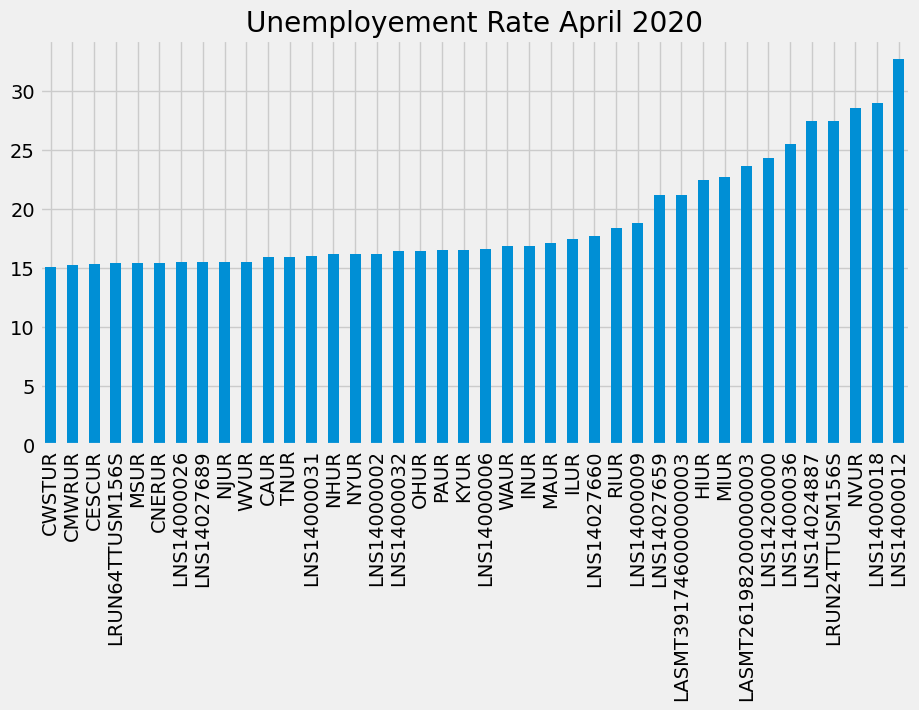

In [124]:
a2020_plot = april2020.plot(kind='bar',figsize=(10,5),title='Unemployement Rate April 2020')
a2020_plot.legend().remove()
a2020_plot